## Comprimindo imagens do cifar10 https://www.cs.toronto.edu/~kriz/cifar.html com AE convolucional

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.layers import UpSampling2D  # alternativa
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

In [31]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0

x_train.shape, y_train.shape

x_train[0].max(), x_train[0].min()



(1.0, 0.0)

In [32]:
autoencoder = Sequential()  

#ENCONDER
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
autoencoder.add(MaxPooling2D((2,2), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Flatten())

#DECODER
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=3, kernel_size=(3,3), activation='sigmoid', padding='same'))


#autoencoder.add(Reshape((8, 8, 8)))
#autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.summary(expand_nested=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(x_test, x_test, epochs=15, batch_size=256, validation_data=(x_train, None))

Epoch 1/15
40/40 [==============================] - 3s 64ms/step - loss: 0.6764 - accuracy: 0.4821 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 1s 24ms/step - loss: 0.6252 - accuracy: 0.5220 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 1s 23ms/step - loss: 0.6146 - accuracy: 0.5727 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/15
40/40 [==============================] - 1s 23ms/step - loss: 0.6086 - accuracy: 0.5735 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/15
40/40 [==============================] - 1s 28ms/step - loss: 0.6044 - accuracy: 0.5776 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/15
40/40 [==============================] - 1s 28ms/step - loss: 0.6012 - accuracy: 0.5833 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/15
40/40 [==============================] - 1s 24ms/step - loss: 0.5986 - accuracy: 0.5882 - val_l

In [34]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[6].output)

In [35]:
imgs_codificada = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


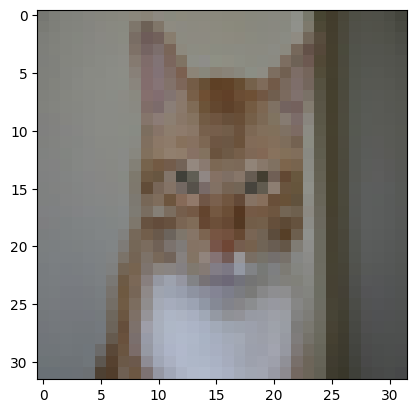

In [36]:
index_test = np.random.randint(0, x_test.shape[0], 1)

img_tst = x_test[index_test].reshape(32, 32, 3)

plt.imshow(img_tst)



(10000, 128)

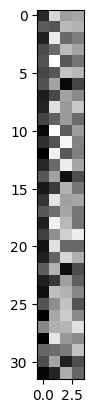

In [37]:
plt.imshow(imgs_codificada[index_test].reshape(32, 4), cmap='gray')
imgs_codificada.shape

313/313 [==============================] - 1s 3ms/step


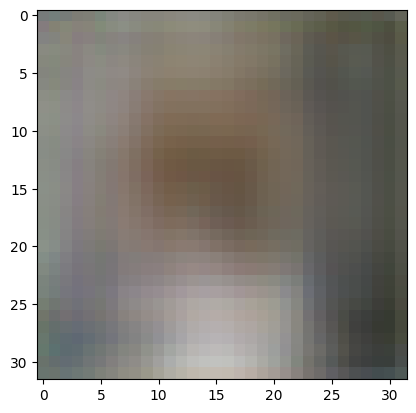

In [39]:
imagens_decodificadas = autoencoder.predict(x_test)
imagens_decodificadas = imagens_decodificadas.reshape(-1, 32, 32, 3)
plt.imshow(imagens_decodificadas[index_test].reshape(32, 32, 3))
